In [2]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 +x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [6]:
AND(1,1)

1

In [7]:
import numpy as np

def AND2(x1, x2):
    x= np.array([x1, x2])
    w = np.array([0.5,0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [8]:
AND(0,0)

0

In [9]:
import numpy as np

def NAND(x1, x2):
    x= np.array([x1, x2])
    w = np.array([-0.5,-0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [12]:
NAND(1,1)

0

In [13]:
import numpy as np

def OR(x1, x2):
    x= np.array([x1, x2])
    w = np.array([0.5,0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [15]:
OR(0,1)

1

In [16]:
def XOR(x1,x2):
    s1 = NAND(x1,x2)
    s2 = OR(x1,x2)
    y = AND2(s1,s2)

    return y 

In [19]:
XOR(1,)

1

sigmoid & relu

In [20]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

def relu(x):
    return np.maximum(0,x)



softmax

In [23]:
def softmax(a):
    return np.exp(a) / np.sum(np.exp(a))

In [24]:
def softmax_2(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    return np.exp(a) / np.sum(exp_a)

mnist

In [26]:
import pandas as pd

df_train = pd.read_csv('/home/addinedu/dev_ws/data/machine/mnist_train.csv')
df_test = pd.read_csv('/home/addinedu/dev_ws/data/machine/mnist_test.csv')

df_train.shape, df_test.shape

((60000, 785), (10000, 785))

In [27]:
X_train = np.array(df_train.iloc[:, 1:])
y_train = np.array(df_train['label'])

X_test = np.array(df_test.iloc[:, 1:])
y_test = np.array(df_test['label'])

In [28]:
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [29]:
img = X_train[0]
label = y_train[0]

img = img.reshape(28,28)
img_show(img)

In [31]:
import pickle 

def init_network():
    with open("/home/addinedu/dev_ws/data/machine/sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
    return network

In [32]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax_2(a3)

    return y

In [34]:
network = init_network()
accuracy_cnt = 0

for i in range(len(X_train)):
    y_pred = predict(network, X_train[i])
    p  =np.argmax(y_pred)
    if p == y_train[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(X_train)))

/tmp/ipykernel_7241/91620759.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1+np.exp(-x))


Accuracy:0.9251833333333334


In [35]:
batch_size = 32
accuracy_cnt = 0

for i in range(0, len(X_train), batch_size):
    X_batch = X_train[i:i+batch_size]
    y_batch = predict(network, X_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum( p == y_train[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(X_train))) 

/tmp/ipykernel_7241/91620759.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1+np.exp(-x))


Accuracy:0.9251833333333334


In [1]:
import numpy as np

raw_data = np.genfromtxt('/home/addinedu/dev_ws/data/machine/x09.txt', skip_header= 36)
raw_data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

In [2]:
len(raw_data)

25

In [5]:
raw_data.size

125

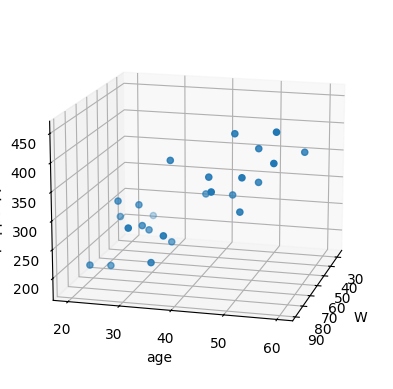

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

xs = np.array(raw_data[:,2], dtype=np.float32)
ys = np.array(raw_data[:,3], dtype=np.float32)
zs = np.array(raw_data[:,4], dtype=np.float32)

fig = plt.figure()
ax = fig.add_subplot(111, projection= '3d')
ax.scatter(xs,ys,zs)
ax.set_xlabel('W')
ax.set_ylabel('age')
ax.set_zlabel('blood hat')
ax.view_init(15,15)
plt.show()




In [9]:
x_data = np.array(raw_data[:, 2:4], dtype=np.float32)
y_data = np.array(raw_data[:, 4], dtype=np.float32)

y_data = y_data.reshape((25,1))

In [11]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2,)),
])

model.compile(optimizer = 'rmsprop', loss = 'mse')

2024-05-10 10:17:33.879161: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-10 10:17:34.889660: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/addinedu/venv/opencv2_venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-10 10:17:36.162320: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returnin

In [13]:
hist = model.fit(x_data, y_data, epochs=3000)

Epoch 1/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 23801.2402
Epoch 2/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 23769.9766
Epoch 3/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 23738.7383
Epoch 4/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 23707.5234
Epoch 5/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 23676.3301
Epoch 6/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 23645.1562
Epoch 7/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 23614.0176
Epoch 8/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 23582.9004
Epoch 9/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 23551.8066
Epoch 10/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 23520.7402
Epoch 11/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 23489.6953
Epoch 12/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 23458.6758
Epoch 13/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 23427.6777
Epoch 14/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 23396.7109
Epoch 15/3000
1

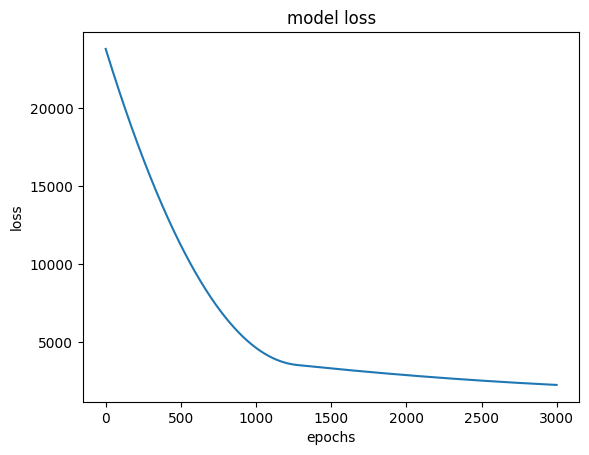

In [14]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [15]:
model.predict(np.array([100,40]).reshape(1,2))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


array([[377.46323]], dtype=float32)

In [16]:
model.predict(np.array([60,25]).reshape(1,2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[232.09952]], dtype=float32)

In [17]:
W_, b_ = model.get_weights()


In [23]:
x = np.linspace(20,100,50).reshape(50,1)
y = np.linspace(10,70,50).reshape(50,1)
X = np.concatenate((x,y), axis = 1)
Z = np.matmul(X, W_) + b_

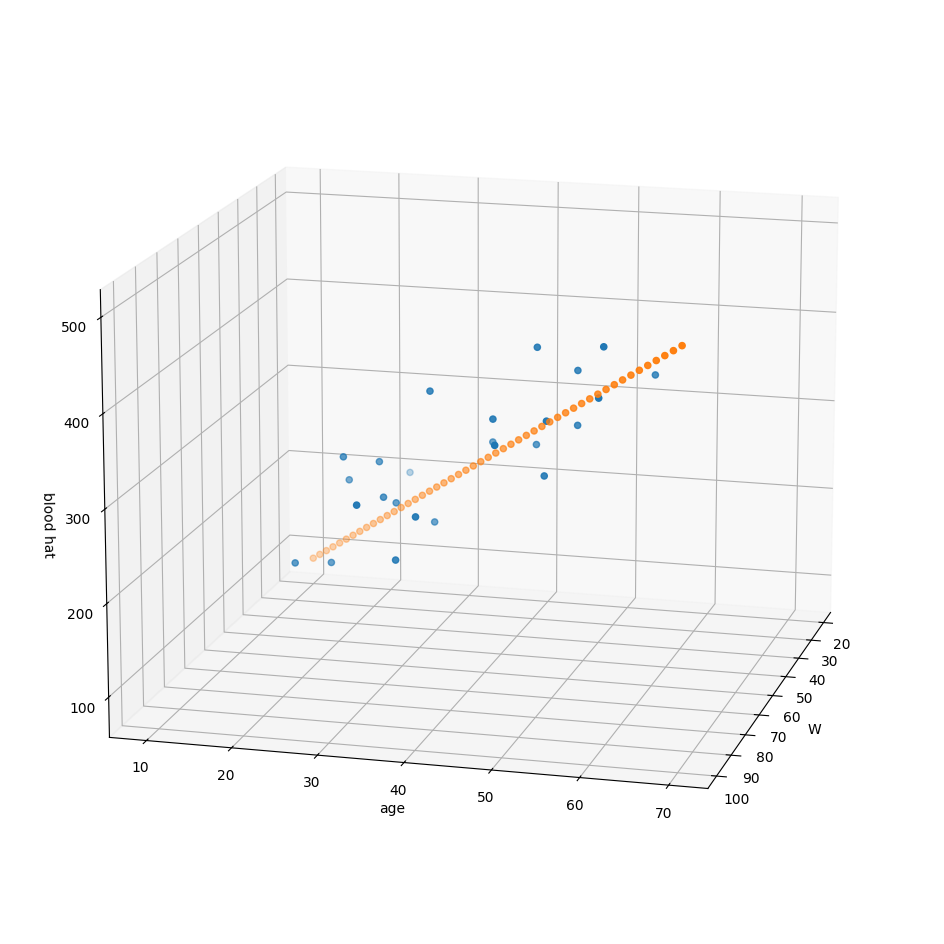

In [24]:

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection= '3d')
ax.scatter(xs,ys,zs)
ax.scatter(x,y,Z)
ax.set_xlabel('W')
ax.set_ylabel('age')
ax.set_zlabel('blood hat')
ax.view_init(15,15)
plt.show()




In [26]:
X = np.array([ [0,0],
              [1,0],
              [0,1],
              [1,1] ])

y = np.array( [[0], [1], [1], [0]])



In [27]:


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2, activation='sigmoid' , input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid'),

])


/home/addinedu/venv/opencv2_venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:

model.compile(optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.01), loss = 'mse')



In [30]:
hist = model.fit(X,y, epochs=4000, batch_size=1)

Epoch 1/4000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1997  
Epoch 2/4000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1959 
Epoch 3/4000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2484 
Epoch 4/4000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2097 
Epoch 5/4000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3591 
Epoch 6/4000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3466 
Epoch 7/4000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2908 
Epoch 8/4000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3325 
Epoch 9/4000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3044 
Epoch 10/4000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2825 
Epoch 11/4000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2514 
Epoch 12/4000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2462 
Epoch 13/4000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2305 
Epoch 14/4000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2513 
Epoch 15/4000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2018 
Epo

In [31]:
model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


array([[0.5234319 ],
       [0.48234618],
       [0.5196745 ],
       [0.477573  ]], dtype=float32)

<function matplotlib.pyplot.show(close=None, block=None)>

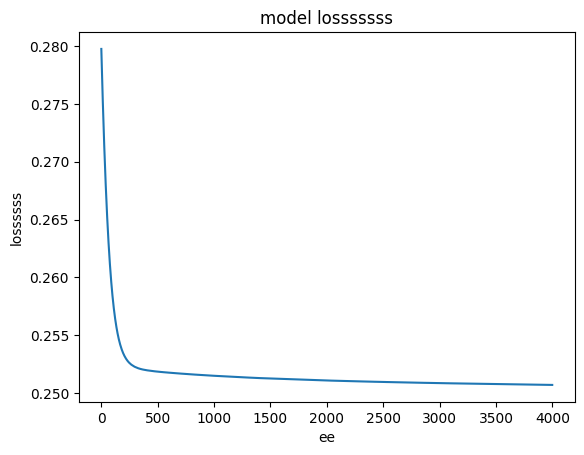

In [33]:
plt.plot(hist.history['loss'])
plt.title('model losssssss')
plt.ylabel('lossssss')
plt.xlabel('ee')
plt.show

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
enc.fit(y.reshape(len(y), 1))

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [5]:
enc.categories_

[array([0, 1, 2])]

In [6]:
y_onehot = enc.transform(y.reshape(len(y), 1))
y_onehot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=13)


In [11]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32,input_shape=(4,), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

NameError: name 'tf' is not defined

In [9]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

NameError: name 'model' is not defined

In [10]:

hist = model.fit(X_train, y_train, epochs=100)

NameError: name 'model' is not defined